In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
file_path = '/content/drive/MyDrive/Data Analytics/2. Customer Churn/CustomerChurn.csv'
df=pd.read_csv(file_path)

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [12]:
encoded_data = pd.get_dummies(df[['gender', 'Partner', 'Dependents', 'Churn']], drop_first=True)

In [13]:
correlation_encoded = encoded_data.corr()
correlation_with_churn = correlation_encoded['Churn_Yes'].sort_values(ascending=False)
correlation_with_churn

Churn_Yes         1.000000
gender_Male      -0.008612
Partner_Yes      -0.150448
Dependents_Yes   -0.164221
Name: Churn_Yes, dtype: float64

In [14]:
all_correlations = df.corrwith(encoded_data['Churn_Yes']).sort_values(ascending=False)
all_correlations

<ipython-input-14-db4ecfeee3fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_correlations = df.corrwith(encoded_data['Churn_Yes']).sort_values(ascending=False)


MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199428
tenure           -0.352229
dtype: float64

In [15]:
# Calculate the count of churned and non-churned customers
churn_counts = df['Churn'].value_counts()

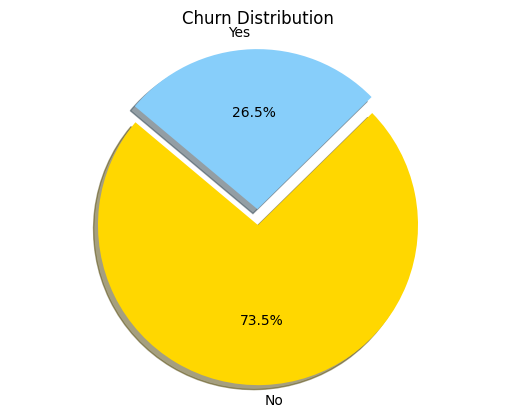

In [16]:
import matplotlib.pyplot as plt

# Data to plot
labels = churn_counts.index
sizes = churn_counts.values
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (Churned)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a title
plt.title('Churn Distribution')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [17]:
# Calculate churn rates for the "Partner" feature
partner_churn_rates = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()['Yes'].sort_values(ascending=False)

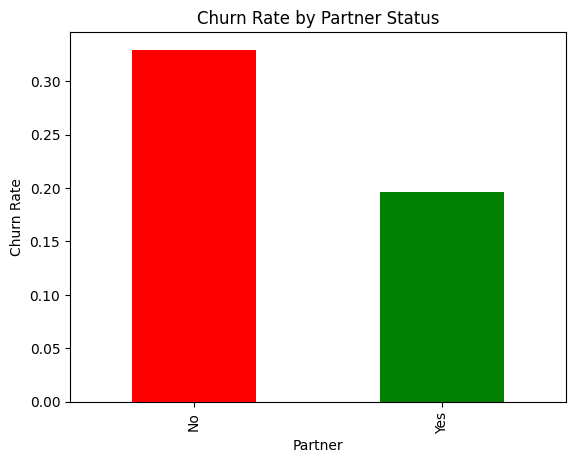

In [18]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart
partner_churn_rates.plot(kind='bar', stacked=True, color=['red', 'green'])

# Add labels and title
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Partner Status')

# Show the chart
plt.show()


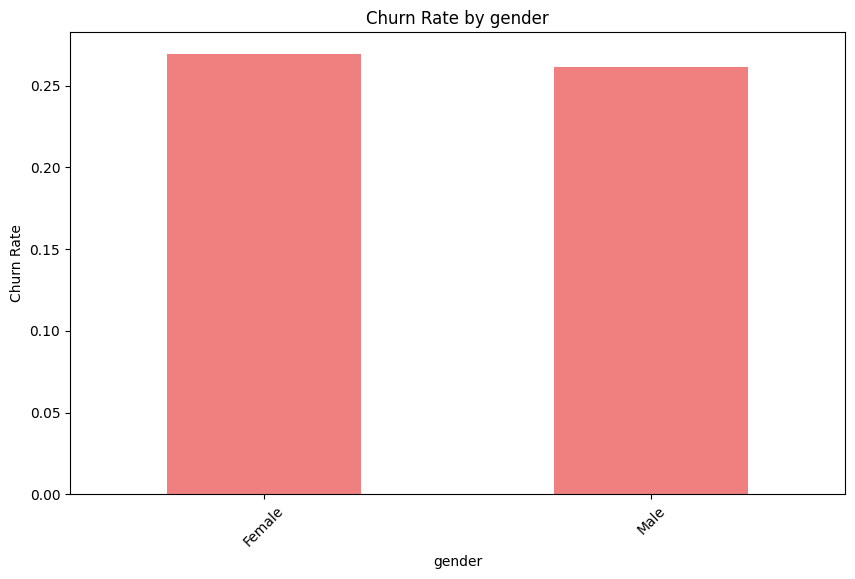

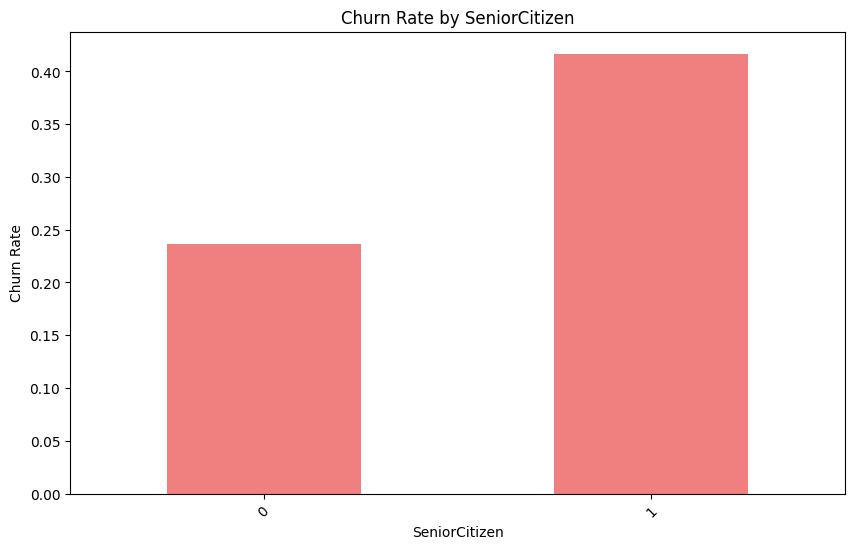

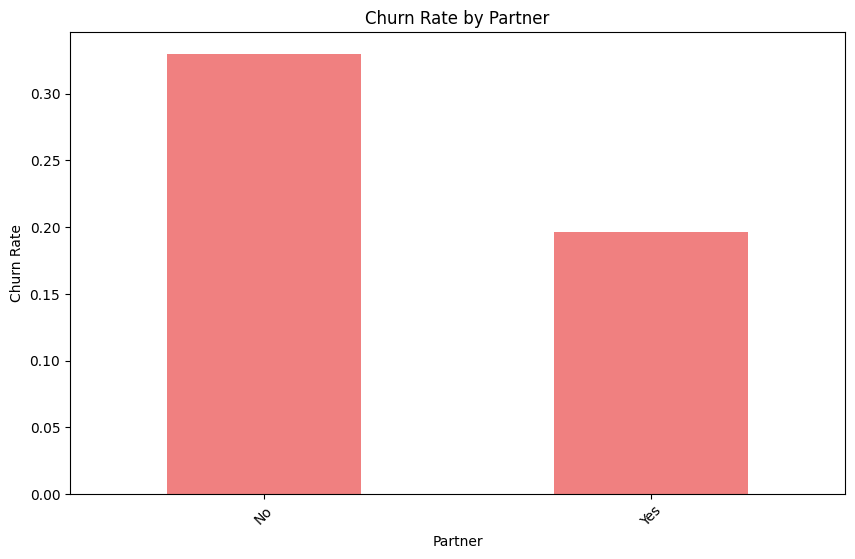

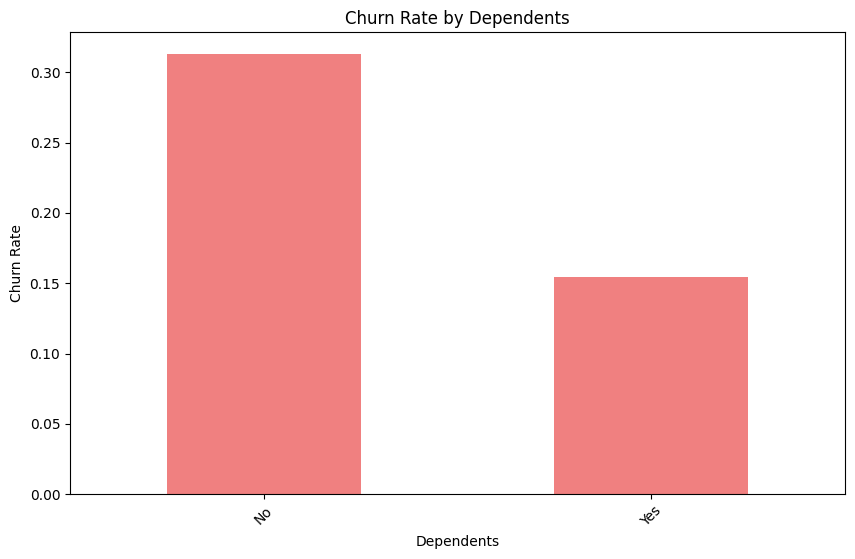

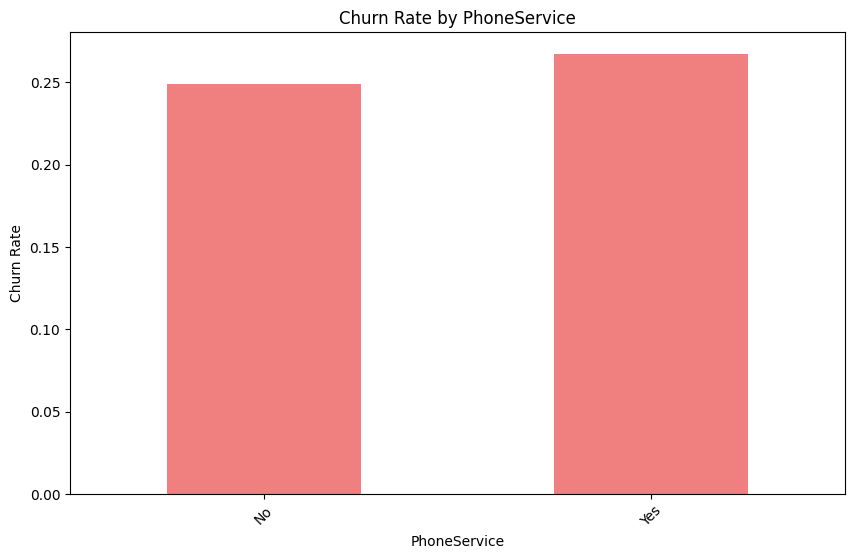

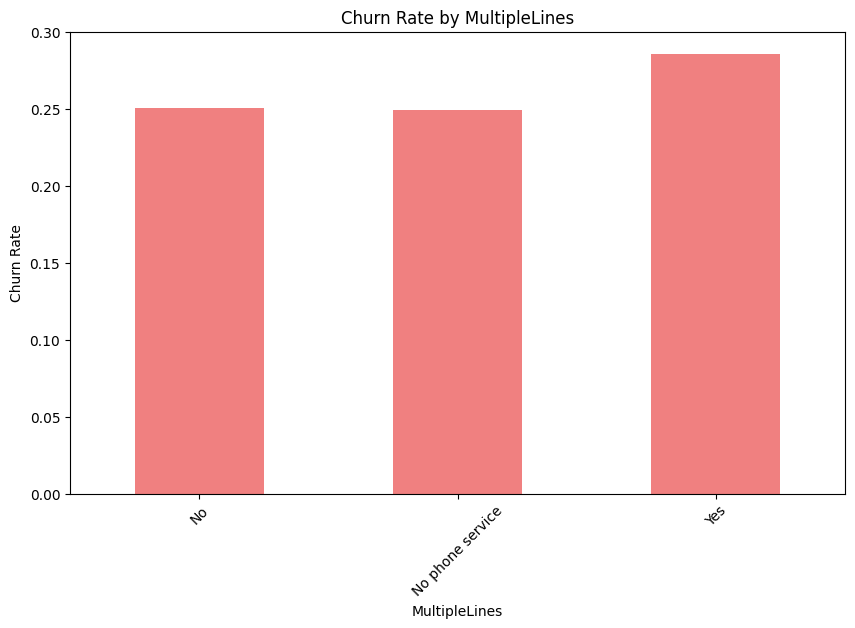

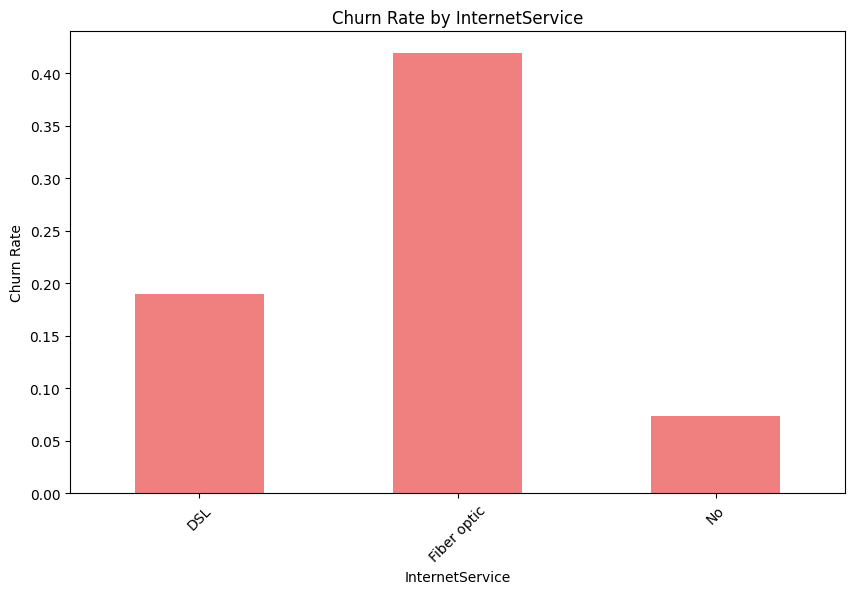

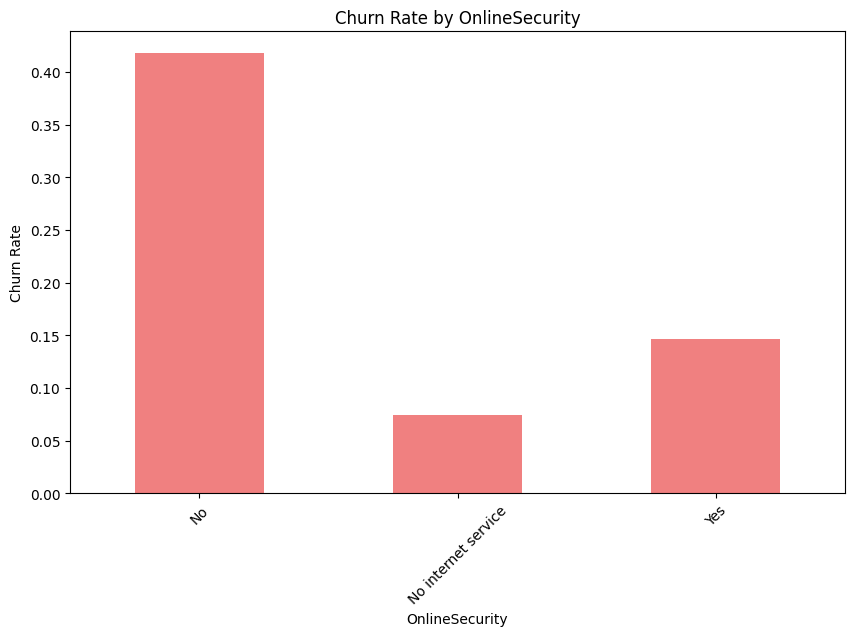

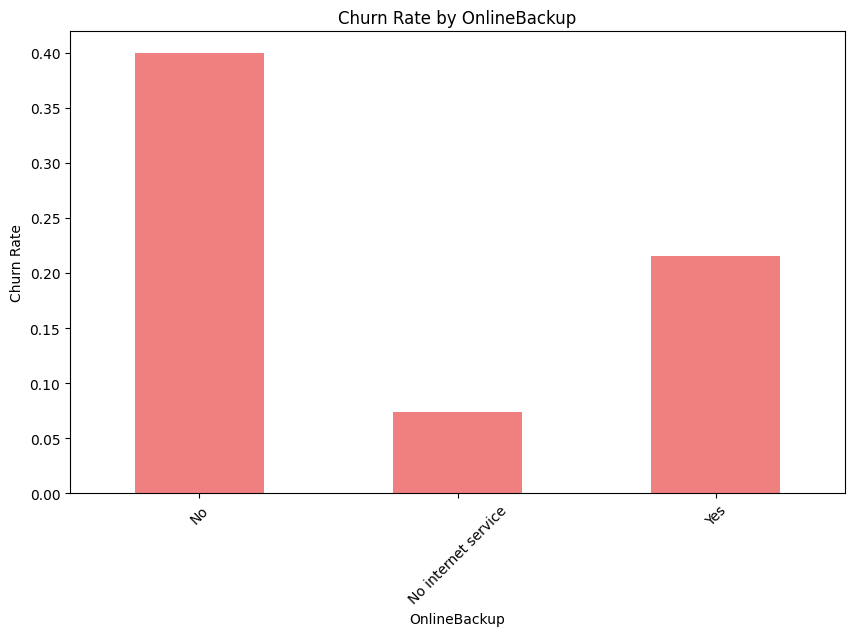

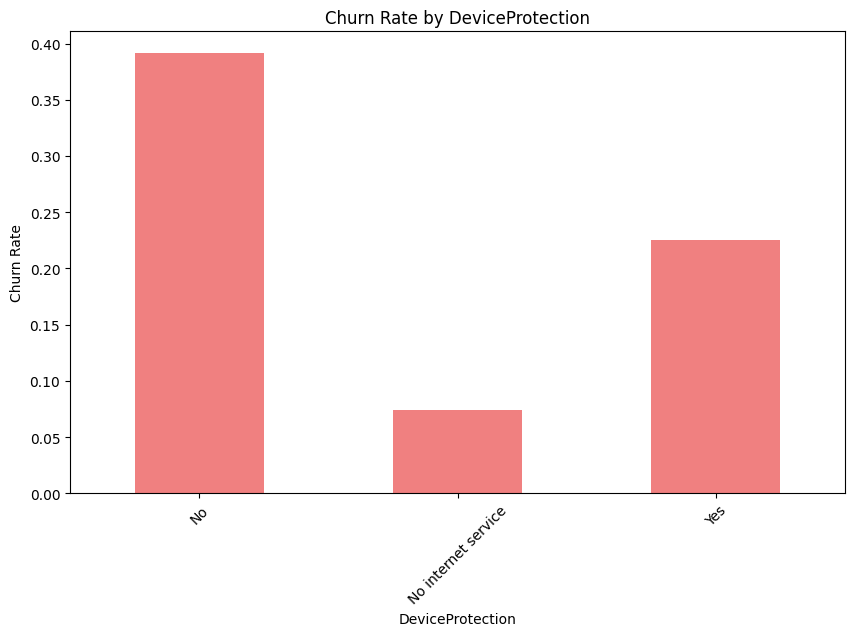

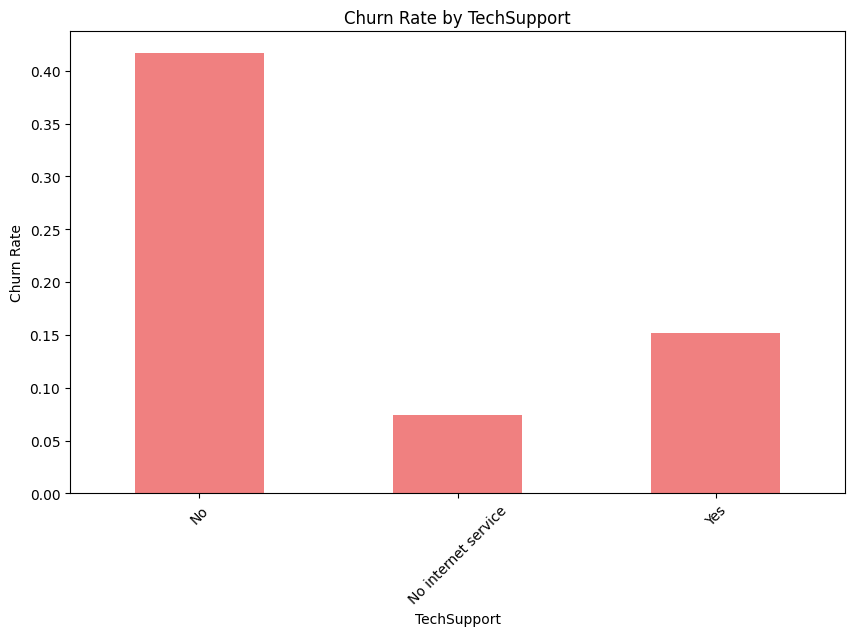

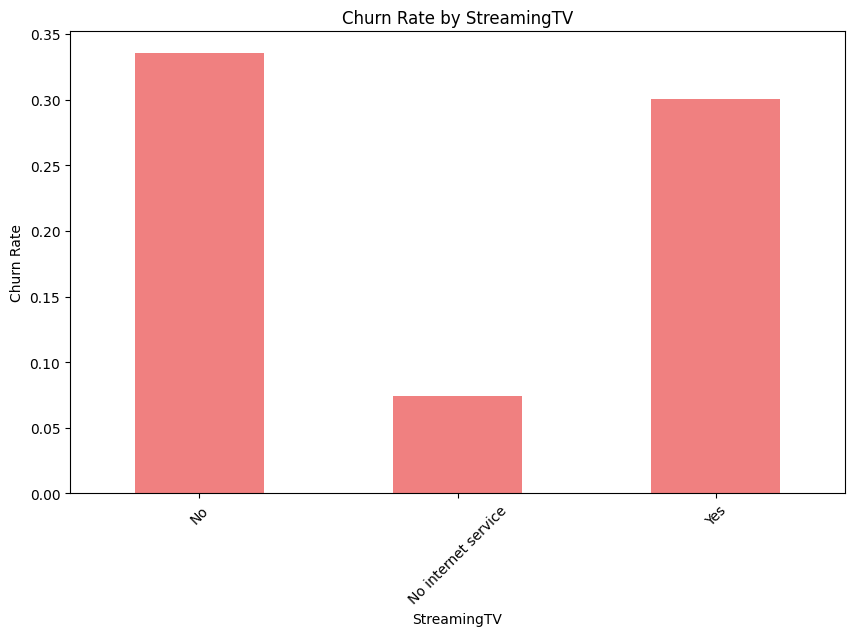

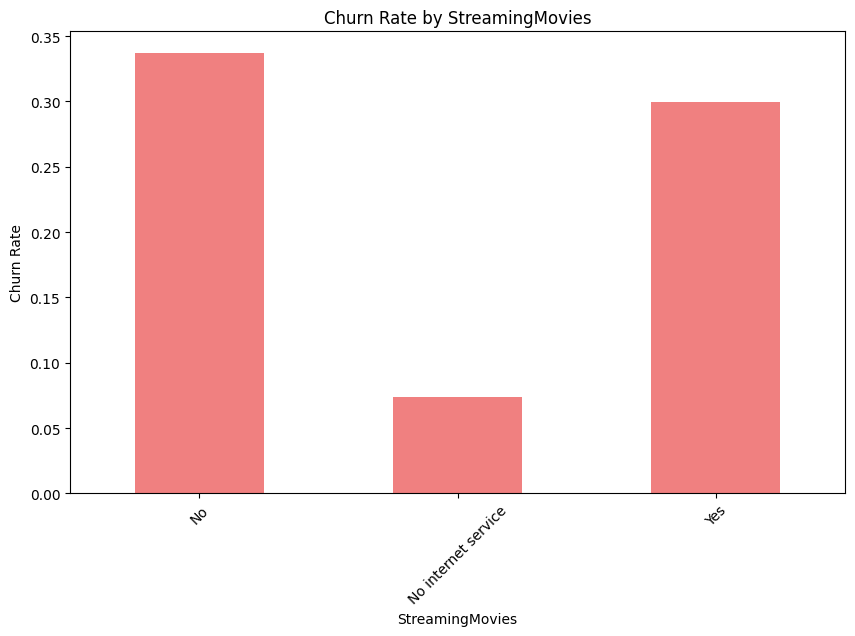

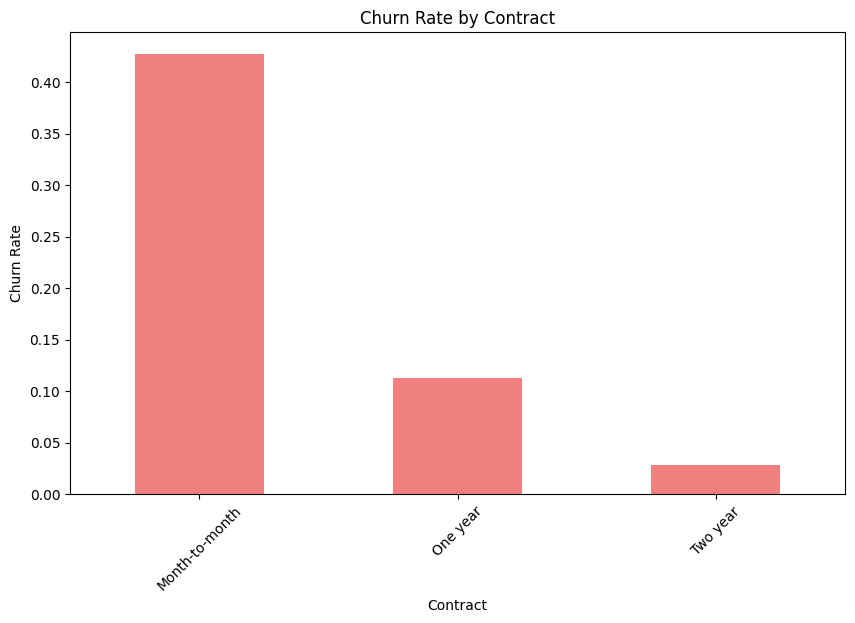

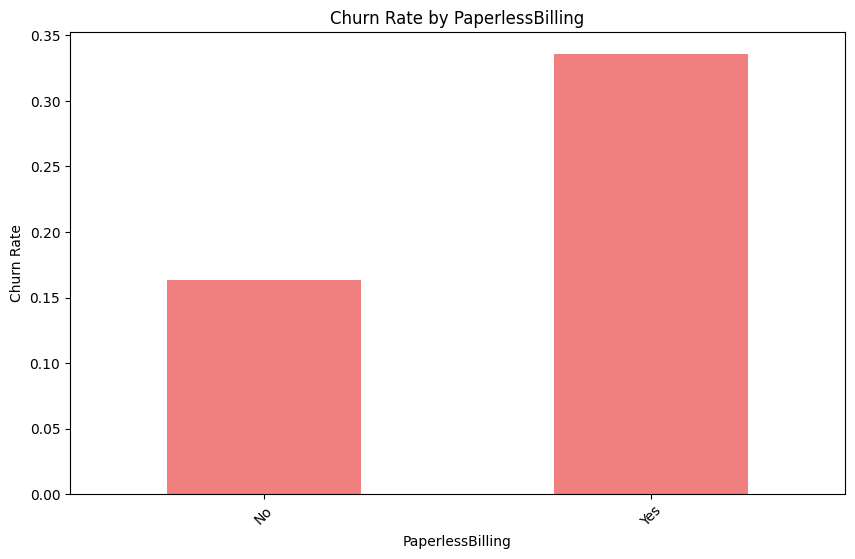

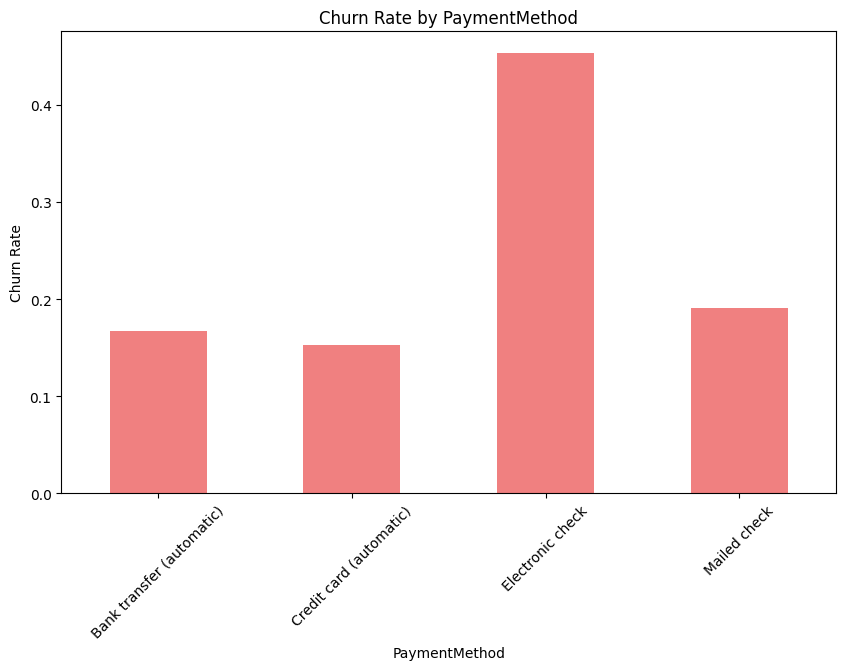

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_grouped_bar_chart(df, feature):
    grouped_data = df.groupby([feature, 'Churn'])['customerID'].count().unstack().fillna(0)
    total_customers = grouped_data.sum(axis=1)
    churn_rate = grouped_data['Yes'] / total_customers

    plt.figure(figsize=(10, 6))
    ax = churn_rate.plot(kind='bar', color='lightcoral')

    ax.set_ylabel('Churn Rate')
    ax.set_xlabel(feature)
    ax.set_title(f'Churn Rate by {feature}')

    plt.xticks(rotation=45)
    plt.show()

# Create grouped bar charts for each of the features
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for feature in categorical_features:
    create_grouped_bar_chart(df, feature)


In [23]:
print(churn_by_tenure)

Churn         No       Yes
tenure                    
0       1.000000       NaN
1       0.380098  0.619902
2       0.483193  0.516807
3       0.530000  0.470000
4       0.528409  0.471591
...          ...       ...
68      0.910000  0.090000
69      0.915789  0.084211
70      0.907563  0.092437
71      0.964706  0.035294
72      0.983425  0.016575

[73 rows x 2 columns]


In [24]:
print(churn_by_tenure.columns)

Index(['No', 'Yes'], dtype='object', name='Churn')


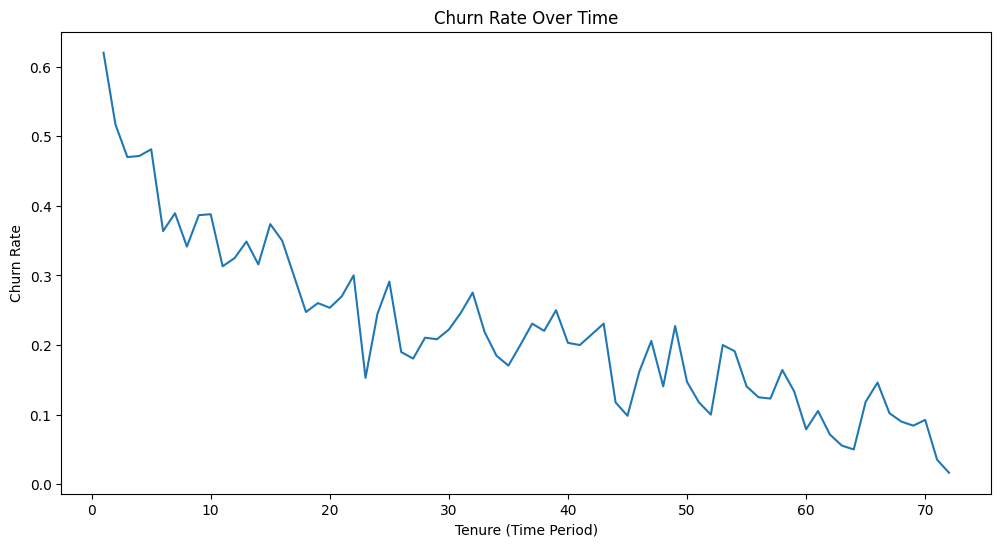

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a time series plot of churn rates over time
churn_by_tenure = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()
churn_by_tenure['Yes'].plot(figsize=(12, 6))
plt.title("Churn Rate Over Time")
plt.xlabel("Tenure (Time Period)")
plt.ylabel("Churn Rate")
plt.show()